# Week 9

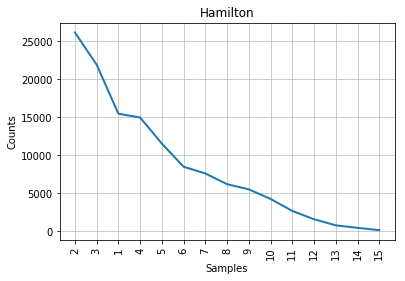

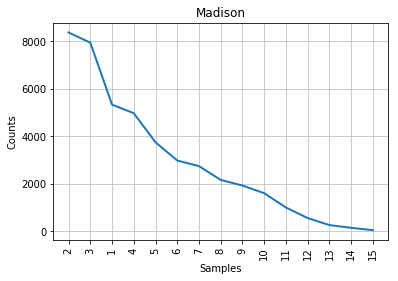

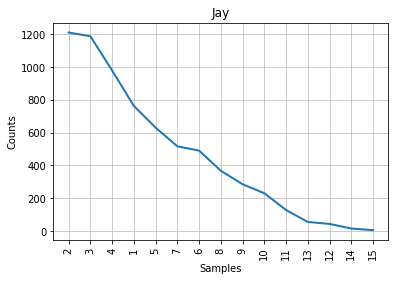

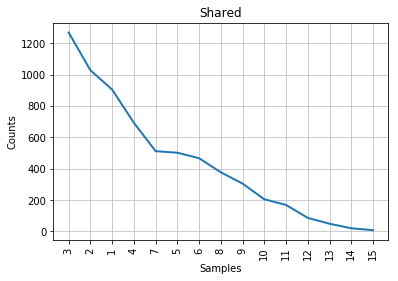

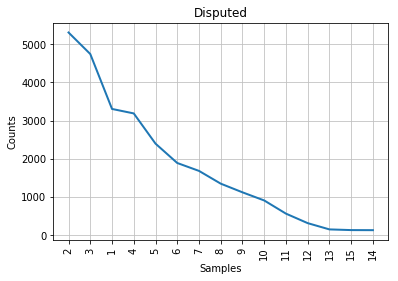

In [38]:
import nltk
#nltk.download()
#C:\Users\etyanis\AppData\Roaming\nltk_data
papers={"Madison":[10,14,37,38,39,40,41,42,43,44,45,46,47,48],
       "Hamilton":[1,6,7,8,9,11,12,13,15,16,17,21,22,23,24,25
                  ,26,27,28,29,30,31,32,33,34,35,36,59,60
                  ,61,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85],
       "Jay":[2,3,4,5],
       "Shared":[18,19,20],
       "Disputed":[49,50,51,52,53,54,55,56,57,58,62,63]}
def read_files(filename):
    strings=[]
    a="data\ "
    for file in filename:
        b=str(file)
        with open(a.rstrip()+'federalist_'+b+'.txt') as f:
            strings.append(f.read())
    #print ('\n'.join(strings),"\n \n \n ------------------------------NEW START----------------")
    return ('\n'.join(strings))
federalist_by_author={}
for author,files in papers.items():
    federalist_by_author[author]=read_files(files)

authors=("Hamilton","Madison","Jay","Shared","Disputed")
author_tokens={}
length_distribution={}
for author in authors:
    tokens=nltk.word_tokenize(federalist_by_author[author])  #To break into words
    author_tokens[author]=([token for token in tokens if any(c.isalpha() for c in tokens)])
    token_lengths=[len(token) for token in author_tokens[author]]
    length_distribution[author]=nltk.FreqDist(token_lengths)
    length_distribution[author].plot(15,title=author)

[1, 2, 3]
[(1, 2), (1, 3), (2, 3)]



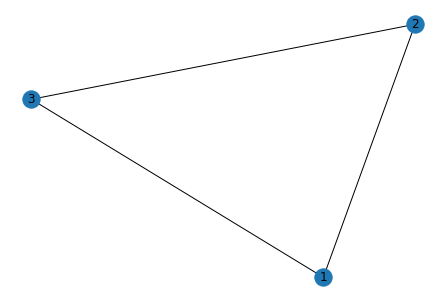

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(1,3)
print (G.nodes())
print (G.edges())
print (G)
nx.draw(G,with_labels=True)
display()
#plt.show()

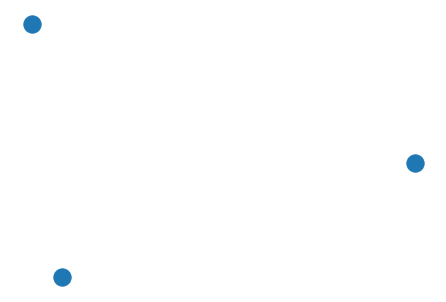

In [44]:
#More nodes
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
l=[1,2,3]
G.add_nodes_from(l)
nx.draw(G)
plt.show()

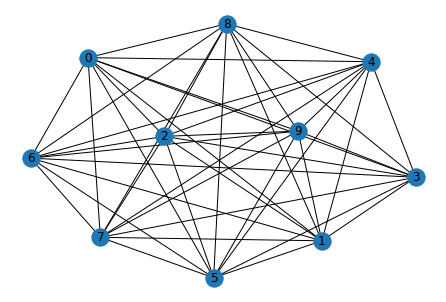

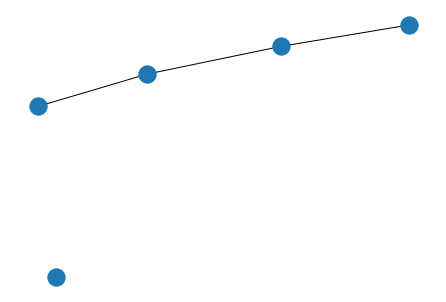

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
9


In [57]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G=nx.complete_graph(10)
nx.draw(G,with_labels=True)
plt.show()
#Other graphs-
#Random graph=Erdos Renyi graph or binomial graph
#Degree of the node will be close to avg degree of graph
G1=nx.gnp_random_graph(5,0.5) #5 nodes with 0.5 probability #Graphs generated may not be complete
nx.draw(G1)
plt.show()
print (G.nodes())   #starts with 0
print (G.edges())
print (G.degree(0))   #0 has 9 degree

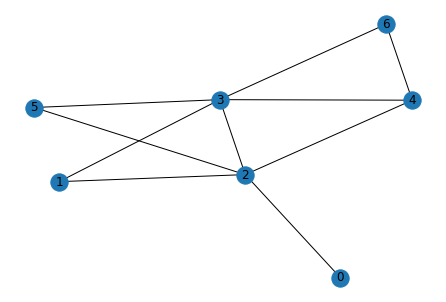

In [68]:
#Mpre type of graph
import networkx as nx
import matplotlib.pyplot as plt
G=nx.barabasi_albert_graph(n=7,m=2)   #n-nodes, m-(no of edges to attach from a new node)each iteration new node
nx.draw(G,with_labels=True)      #barabasi is a connected graph
plt.show()
nx.write_gexf(G,'analysis.gexf') #saving to directory
#Gephi is a tool for visualising graph and doing much more

In [97]:
#Area Calculation
#Colors formed by RGB
#White-(255,255,255) 
#Black-(0,0,0)
#Working on pixels
import numpy as np
from PIL import Image
width=500
height=400
array=np.zeros([height,width,3],dtype=np.uint8)  #3 for 3 colors each of 1 byte
img=Image.fromarray(array)
img.save("Week9-img.png")
array1=np.zeros([height,width,3],dtype=np.uint8)
array1[:,:100]=[255,128,0]    #For orange color
array1[:,100:]=[0,0,255]   #This is blue color
img=Image.fromarray(array1)
img.save("Week9-img2.png")

In [96]:
#Calculate Area
from PIL import Image
im=Image.open('Week9-img2.png')
rgb_im=im.convert("RGB")
r,g,b=rgb_im.getpixel((100,1)) #Till 100 it was orange (1,1)   #dikkat yeh hai keh yeh opposite values le raha
print (r,g,b)

255 128 0


In [30]:
#Program Assignment
'''
Programming Assignment-1: Counter Spiral
Due on 2019-04-04, 23:59 IST
Given a square matrix, you have to write a program to print it in a counter-clockwise spiral form.


Input Format:
The first line of the input contains an integer number n which represents the number of rows and columns in the matrix.
From the second line contains n rows with each row having n elements separated by a space.

Output Format:
Print the elements in a single line with each element separated by a space

Example:

Input:
4
25 1 29 7
24 20 4 32
16 38 29 1
48 25 21 19

Output:
25 24 16 48 25 21 19 1 32 7 29 1 20 38 29 4

Explanation: 
In the above example, each row, first all the elements of the first column is printed which are 25 24 16 48 after that, remaining elements of the last row is printed which are 25 21 and 19.
After which the remaining elements of the last column is printed which are 1 32 and 7 and so on...
Sample Test Cases
Input                Output->1 4 7 8 9 6 3 2 5
Test Case 1	
3
1 2 3
4 5 6
7 8 9
'''
#PA1
import numpy as np
n=int(input())

sp=[]

for i in range(n):
    sp.append([int(x) for x in input().split()])
sp_n=np.array(sp)
print (sp_n)
for i1 in range(n):
    print (sp_n[i1][0],end="")
for j1 in range(n):
    print (sp_n[j1][n-1],end="")
for i2 in range(n):
    print (sp_n[j1][n-1],end="")

4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


In [ ]:
#PA-1 Accepted
def spiral(m,n,a):
  k=0
  l=0
  
  while(k<m and l<n):
    
    for i in range(k,m):
      print(a[i][l],end=" ")
     
    l=l+1
    
    for i in range(l,n):
      print(a[m-1][i],end=" ")
	
    	
    m=m-1  
    if(k<m):
      
      for i in range(m-1,k-1,-1):
        print(a[i][n-1],end=" ")
      
      n=n-1
      
    if(l<n):
      
      for i in range(n-1,l-1,-1):
        print(a[k][i],end=" ")
      k=k+1  

      
    
a=[]            
n=int(input())

for i in range(n):
  
  x=list(map(int,input().split(" ")))
  a.append(x)
         
spiral(n,n,a)

amit@sccilabs.com
sccilabs


In [24]:
#PA2
'''
Given an alphanumeric string S, extract maximum numeric value from that string. All the alphabets are in lower case
Take the maximum consecutive digits as a single number.

Input Format:
The first line contains the string S.

Output Format:
Print the maximum value

Example:

Input:
23dsa43dsa98

Output:
98

Explanation:
There are three integer values present in the string, 23, 43 and 98. Among these, 98 is the maximum.
Sample Test Cases
Input	Output
Test Case 1	
1a2b3c
3
Test Case 2	
12abc23bfd6fdsa
23
Test Case 3	
dsgahjkf876teusg123dsah56
876
Test Case 4	
amit123aman786
786
Test Case 5	
ghjldsagjulsda1234hdsjkalgjk8765dsgayhuf3214bjdksa234bhfjksahj9878dsahjk567
9878
Test Case 6	
1g2g3g4g5g6g7g8
8


'''
a=input()
a=list(a)
b=[]
j=[]
i=0
for i1 in range(len(a)):
    try:
        a[i1]=int(a[i1])
        
    except:
        pass

start=[];end=[]
while(i<len(a)):
    if (type(a[i]))!=int:
        i+=1
        pass
    else:
        
        if type((a[i]))==int:
            start.append(i)
            i+=1
            try:
                while(type(a[i]))==int:
                    i+=1
                end.append(i)
            except:
                end.append(i+1)
fin=[]
for i1 in range(len(a)):
    a[i1]=str(a[i1])
for i in range(len(start)):
    fin.append(int("".join(a[start[i]:end[i]])))
print (max(fin))
    

    

23dsa43dsa98
98


In [18]:
## PA3
'''
Programming Assignment-3: Email ID
Due on 2019-04-04, 23:59 IST
Assuming that we have some email addresses in the "username@companyname.com" format, please write program to print
the company name of a given email address. Both user names and company names are composed of letters only.

Input Format:
The first line of the input contains an email address.

Output Format:
Print the company name in single line.

Example;

Input:
john@google.com

Output:
google


'''
a=input()
a=list(a)
for i in range(len(a)):
    if a[i]=="@":
        start=i+1
    if a[i]==".":
        end=i
a=(a[start:end])
a="".join(a)
print (a)

2
1 2
3 4
1 3 2 4 

# Week 10

In [11]:
#Working with strings
import string
s="RRaja ka baja"
print (s.upper())
print (s.lower())
s1=list(s)
print (s[:2])
print (s1[:2])
print (s.index("a"))  #First occurence
print (s1)
print (s.replace("R","a"))
print (s.replace("RR","#@@@@@@@"))


RRAJA KA BAJA
rraja ka baja
RR
['R', 'R']
2
['R', 'R', 'a', 'j', 'a', ' ', 'k', 'a', ' ', 'b', 'a', 'j', 'a']
aaaja ka baja
#@@@@@@@aja ka baja


In [2]:
#FLAMES- First remove the common letter only 1 at a time, then start cutting Flames by the length of the final list
#you just obtained till only 1 alphabet is left. That is your answer-F-Friends,Love,Affection,Enemy,Sibling

def Flames(l1,l2):
    for i in l1:
        for j in l2:
            if i==j:
                l1.remove(i)
                l2.remove(j)
                return (True,l1,l2)
    return (False,l1,l2)
input1=input()
input1=input1.lower()
input2=input()
input2=input2.lower()
l11=list(input1)
l22=list(input2)
proceed=True
while (proceed==True):
    l=(Flames(l11,l22))
    proceed=l[0]
    la=l[1]
    lb=l[2]
print (la,lb)
count=len(la)+len(lb)
print (count)

FLAMES1=['Friend','Love','Affection','Mate','Enemy',"Sibling"]
def cut(flame,countsize,index):
    cut=1
    while cut:
        try:
            print ("removing",flame[countsize-1],"at index",countsize-1)
            flame.remove(flame[countsize-1])
            cut=0
            if countsize-1==len(flame):
                index=0
            else:
                index=countsize-1
            return (True,flame,index)
        except:
            countsize=countsize-len(flame)
flame=FLAMES1   
proceed2=True
while(proceed2==True):
    index=0
    out=cut(flame,count,index)
    flame=out[1]
    if len(flame)==1:
        print (flame[0])
        proceed2=False
    else:
        proceed2=True
        flame=flame[out[2]:]+flame[:out[2]]
        #print ("changed after cut",flame)
    


sakshi
akash
['s', 'i'] ['a']
3
removing Affection at index 2
removing Sibling at index 2
removing Mate at index 2
removing Love at index 2
removing Enemy at index 0
Friend


In [22]:
#Basic Arrays
import numpy as np
a=np.array([1,2,3])
#b=np.array([1,2,3],[4,7,8])
c=np.array([[1,2,3],[4,5,6]])
print (c.shape)
print (c.size)
d=np.zeros((2,3))
print (d)
e=np.ones((3,2))
print (e)
f=np.full((4,4),5)
print (f)
g=np.random.random((3,4))
print (g)

(2, 3)
6
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[0.97289192 0.14841223 0.89394291 0.2187929 ]
 [0.00934175 0.03231488 0.16922344 0.43422696]
 [0.51362722 0.28588889 0.33188282 0.71611996]]


In [82]:
#More basics
import numpy as np
a=np.array([1,2])
a1=np.array([[1,2,3,4],[6,7,8,9]])
b=np.array([3.0,4])
print (type(a))
print (a.dtype)
print (type(b))
print (b.dtype)
c=np.array([1,2],dtype=np.int64)
print (c.dtype)
print (a+b)
print (np.add(a,b))
print (a-b)
print (np.subtract(a,b))
print (a*b)
print (np.multiply(a,b))
print (a/b)
print (np.divide(a,b))
print (np.sqrt(a))
print (a1.T)
print (a.sum())
print (np.sum(a1,axis=0)) #Column wise sum
print (np.sum(a1,axis=1)) #Row-wise wise sum
#Python takes more time but has higher built in libraries, while c and c++ are more efficient so used in desgning
#systems while python is used by researchers

<class 'numpy.ndarray'>
int32
<class 'numpy.ndarray'>
float64
int64
[4. 6.]
[4. 6.]
[-2. -2.]
[-2. -2.]
[3. 8.]
[3. 8.]
[0.33333333 0.5       ]
[0.33333333 0.5       ]
[1.         1.41421356]
[[1 6]
 [2 7]
 [3 8]
 [4 9]]
3
[ 7  9 11 13]
[10 30]


(256, 256)


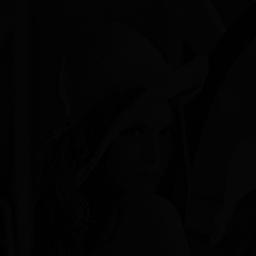

In [151]:
#Image Compression
import numpy as np
from PIL import Image
im=Image.open("lena.jpg")
I=np.asanyarray(im)
pixelMap=im.load()
img=Image.new(im.mode,im.size)
pixelNew=img.load()
#img.show()
#print (im)
#print (np.array(img))
#im1=im.convert("L")
#im1.show()
#print (np.array(im).shape)
#print (np.array(im).shape)
print (im.size)
for i in range(im.size[0]):
    for j in range(im.size[1]):
        if pixelMap[i,j]<=31:
            pixelNew[i,j]=0
        elif pixelMap[i,j]<=63:
            pixelNew[i,j]=1
        elif pixelMap[i,j]<=95:
            pixelNew[i,j]=2
        elif pixelMap[i,j]<=127:
            pixelNew[i,j]=3
        elif pixelMap[i,j]<=159:
            pixelNew[i,j]=4
        elif pixelMap[i,j]<=191:
            pixelNew[i,j]=5
        elif pixelMap[i,j]<=223:
            pixelNew[i,j]=6
        elif pixelMap[i,j]<=255:
            pixelNew[i,j]=7
img.save('lena2.jpg')
display(Image.open('lena2.jpg'))
img.show()
l=np.asanyarray(Image.open('lena2.jpg'))

In [6]:
#Programming Assignment
#P1
'''
Programming Assignment-1: Special Character
Due on 2019-04-11, 23:59 IST
Given a string S, check whether it contains any special character or not. Print 'YES' if it does else 'NO'.

Input Format:

The first line contains the string S

Output Format:

Print 'YES' or 'NO'

Example:

Input:
Hi$my*name

Output:
YES


'''
a=input()

k=0
for i in a:
    if (ord(i)>=33 and ord(i)<=47)or (ord(i)>=58 and ord(i)<=64)or (ord(i)>=91 and ord(i)<=96)or (ord(i)>=123 and ord(i)<=127):
        print ("YES")
        k=1
        break
if k==0:
    print ("NO")
    


SyntaxError: invalid syntax (<ipython-input-6-60582fc1390a>, line 30)

In [9]:
#P2
'''
Programming Assignment-2: Jumps
Due on 2019-04-11, 23:59 IST
One day Ajit got a strange feeling of jumping from one point to another. The jumping will be done in one dimension
only. 
He will start from a point 0 and from there he will perform a lot of jumps. He can only jump in a specific seq: 
1­jump, 2­jump, 3­jump, 1­jump, 2­jump, 3­jump, 1­jump, and so on. (1­>2­>3­>1­>2­>3­>1.....)

1-­jump means that if Ajit is at the point x, he will jump to the point x+1. 
2­-jumps mean that if Ajit is at the point x, he will jump to the point x+2. 
3­-jumps mean that if Ajit is at the point x, he will jump to the point x+3. 

Before the start Ajit asks you: will he arrive at the point a after some number of jumps?

Input Format:
The first line contains a single number a denoting the point Ajit asks about.

Output Format:
Output "YES" without a quotes if Ajit can arrive at point a or "NO" without quotes 
otherwise.

Example-1:

Input:
0

Output:
YES

Explanation:
He started at point 0

Example-2:

Input:
2

Output:
NO

Explanation:
From 0 he can take 1 jump to reach point 1 but after that  he can take only 2 jumps which will lead him to point 3.
Jump sequence (1­>2).

NOTE: The value of a can be as large as 1018. Please make your program efficient or you may receive run time error.
Sample Test Cases
Input	Output
Test Case 1	
3
YES
Test Case 2	
4
NO
Test Case 3	
102
YES
Test Case 4	
110011010
NO
Test Case 5	
178235689434
YES
Test Case 6	
9999999912133332
YES



'''
a=int(input())
k1=0
if (a>10):
    if a%10==0:
        a=a/10
        k1+=1
else:
    k1=1
        
    
i=0;k=0
while(True):
    i+=1
    if i%3==1:
        k+=1
    elif i%3==2:
        k+=2
    else:
        k+=3
    if k==a**k1:
        print ("YES")
        break
    elif k<a:
        pass
    else:
        print ("NO")
        break
    
#print ("Over")           

4
NO


In [95]:
#P3
'''
Programming Assignments-3: Calculate
Due on 2019-04-11, 23:59 IST
Write a program that calculates and prints the value according to the given formula:
Q = Square root of [(2 * C * D)/H]
Following are the fixed values of C and H:
C is 50. H is 30.
D is the variable whose values should be input to your program in a comma-separated sequence.

Input Format:
A sequence of values for D with each value separated by a comma.

Output Format:
Print the sequence of Q values with each value separated by a comma.

Example:

Input:
100,150,180

Output:
18,22,24
Sample Test Cases
Input	Output
Test Case 1	
10,20,30,40
6,8,10,12
Test Case 2	
1,2,3,4,5,6,7,8,9,10
2,3,3,4,4,4,5,5,5,6
Test Case 3	
5,1,3,4,2,6,8
4,2,3,4,3,4,5
Test Case 4	
23,31,24,53,31
9,10,9,13,10
'''
import math
D=[int(x) for x in input().split(",")]
#print (type(D[0]),D[0])
Q=[0 for i in range(len(D))]

a=D[0]

for i in range(len(D)):
    Q[i]=(math.sqrt((2*50*(D[i]))/30))

#print ("Q type",type(Q[0]),Q[0])

for i in range(len(Q)):
    
    if i<len(Q)-1:
        print (int(round(Q[i],0)),end=",")
    else:
        print (int(round(Q[i],0)),end="")

10,20,30,40
6,8,10,12

In [88]:
#33-47

3.0


In [50]:
#Quiz
print('new' 'line')

newline


In [52]:
s="SImRan"
print(s.upper())

SIMRAN


In [53]:
s="Python"
print(s[::-1])

nohtyP


In [56]:
import numpy as np
a = np.array([1,2,3,5,8])
b = np.array([0,3,4,2,1])
c = a + b
c = c*a
print (c[2])

21


In [127]:
a = np.array([[1,2,3],[0,1,4]])
print (a.size)
print (a.shape)
a[1,2]==a[1][2]

6
(2, 3)


True

In [62]:
import numpy
numpy.asanyarray(input())

[1,2,3]


array('[1,2,3]', dtype='<U7')

In [63]:
import numpy as np
a = np.array([[0, 1, 0], [1, 0, 1]])
a += 3
b = a + 3
print (a[1,2] + b[1,2])

11


# Week 11

In [27]:
#Browser Automation 
from selenium import webdriver
browser=webdriver.Chrome("chromedriver") #or give path where stored
browser.get("https://www.seleniumhq.org/")
elem=browser.find_element_by_link_text("Download")
elem.click()
search=browser.find_element_by_id("q")
search.send_keys("Write anythin")

In [46]:
#Whatsapp automation
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
driver=webdriver.Chrome("Chromedriver")
driver.get("https://web.whatsapp.com/")
wait=WebDriverWait(driver,600)
target='"SidBlore"'
string="Hello I am bot, under testing by Nishant"
x_arg='//span[contains(@title,'+target+')]'
target=wait.until(EC.presence_of_element_located((By.XPATH,x_arg)))
target.click()
input_box=driver.find_element_by_class_name('_1Plpp')
input_box.send_keys(string+Keys.ENTER)

In [25]:
#For Whatsapp_self
from selenium import webdriver
browser=webdriver.Chrome("Chromedriver")
browser.get("https://web.whatsapp.com/")
name="Check"
msg="Hello I am bot- Tis an automated message-Please dont reply"
input("Enter anything after scanning")
user=browser.find_elements_by_xpath('.//span[@title="{}"]'.format(name))
user.click()


Enter anything after scanningtry


AttributeError: 'list' object has no attribute 'click'

In [23]:
#For FB-Self
from selenium import webdriver
browser=webdriver.Chrome("Chromedriver")
browser.get("https://www.facebook.com/")
search1=browser.find_element_by_id("email")
search1.send_keys("@gmail.com")
search2=browser.find_element_by_id("pass")
search2.send_keys(" ")



In [16]:
#For Messenger-Self
from fbchat import Client
Client1=Client("@gmail.com","")
Client1.isLoggedIn()
Client1.searchForUsers("Vimal",2)

Logging in mailmenishanttyagi@gmail.com...
Attempt #1 failed, retrying
Login of mailmenishanttyagi@gmail.com successful.


[User(uid='100001248800463', type=ThreadType.USER, photo='https://scontent-bom1-2.xx.fbcdn.net/v/t1.0-1/p50x50/45945746_2162501893801416_3172160152157552640_n.jpg?_nc_cat=111&_nc_oc=AQlJ5mkIPVb1cLSRGoIfJV93wc73gx_lrbu0cy1ZTWfdcxoVLeK0RvknMrjBXOwEJO8&_nc_ht=scontent-bom1-2.xx&oh=1929dbddf25a12fd7f4ef337e0180cf1&oe=5D448E3F', name='Siddharth Neemi', last_message_timestamp=None, message_count=None, plan=None, url='https://www.facebook.com/siddharth.neemi', first_name='Siddharth', last_name='Neemi', is_friend=False, gender='male_singular', affinity=None, nickname=None, own_nickname=None, color=None, emoji=None)]

In [50]:
#Fun with Calenders
import datetime 
from datetime import datetime as dt
dt.now()
print (dt.now())
import pytz
tz=pytz.timezone('Singapore')
print (dt.now(tz))

2019-04-11 02:45:09.520856
2019-04-11 05:15:12.523856+08:00


In [53]:
import pytz
print (pytz.all_timezones[:10])
print (len(pytz.all_timezones))

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau']
591


In [9]:
import calendar
calendar.weekday(2019,4,22) # 0-6 ->Mon to Sun

0

In [114]:
#Find day from y-m-d
import calendar
a=[int (x) for x in input("Enter valid year-from 1970 Enter valid month Enter valid day").split()]
lt=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
lt[calendar.weekday(a[0],a[1],a[2])]

Enter valid year-from 1970 Enter valid month Enter valid day2017 6 18


[6]

In [115]:
import datetime 
print(datetime.date(2018,12,12))

2018-12-12


In [117]:
import pytz
t=pytz.timezone('Singapore')
print (dt.now(t))

2019-04-14 19:52:17.064584+08:00


In [72]:
#Compare different timezones
from datetime import datetime as dt
import pytz
tzs=pytz.all_timezones
for i in range(len(tzs)):
    if i==10:
        break
    zone=tzs[i]
    print ("Zone",zone)
    print ("time",dt.now(pytz.timezone(zone)))

Zone Africa/Abidjan
time 2019-04-12 00:17:43.788131+00:00
Zone Africa/Accra
time 2019-04-12 00:17:43.788131+00:00
Zone Africa/Addis_Ababa
time 2019-04-12 03:17:43.788131+03:00
Zone Africa/Algiers
time 2019-04-12 01:17:43.788131+01:00
Zone Africa/Asmara
time 2019-04-12 03:17:43.788131+03:00
Zone Africa/Asmera
time 2019-04-12 03:17:43.788131+03:00
Zone Africa/Bamako
time 2019-04-12 00:17:43.788131+00:00
Zone Africa/Bangui
time 2019-04-12 01:17:43.788131+01:00
Zone Africa/Banjul
time 2019-04-12 00:17:43.788131+00:00
Zone Africa/Bissau
time 2019-04-12 00:17:43.788131+00:00


In [112]:
#Assignment
#P1
'''
Programming Assignment-1: Marks distribution
Due on 2019-04-18, 23:59 IST
Given a list A of n elements, representing the marks. There are m students and you have to distribute the marks
from the list A to m students such that:

1) Each student gets marks.
2) The difference between the maximum marks and minimum marks given to the students is minimised.

Input Format:
The first line contains the value n and m respectively separated by a space.
The second line contains the elements of list A separated by a space

Output Format:
Print the minimum difference

Example:

Input:
7 3
7 3 2 4 8 12 56

Output:
2

Explanation:
We need to pick 3 marks for three students (m=3). If we pick 2, 3 and 4, the difference is minimum which is 2.
Sample Test Cases
Input	Output
Test Case 1	
8 5
3 4 1 9 56 7 9 12
6
Test Case 2	
10 4
5 1 8 3 9 2 13 23 4 9
'''
a=[int(x) for x in input().split()]
n=a[0]
m=a[1]
import itertools
l=[int(x) for x in input().split()]
l= (sorted(l,reverse=True))
l1=list( (itertools.combinations(l,m)))     #See how to use itertools for combinations
l1=[list(elem) for elem in l1]             #Convert tuple of list to list of list
#print (l1)
diff_sum=0
diff_suml=[]
for i in range(len(l1)):
    for j in range(len(l1[i])-1):
        diff_sum+=l1[i][j]-l1[i][j+1]
    
    diff_suml.append(diff_sum)
    diff_sum=0
#print (diff_suml)
print (min(diff_suml),end="")


1 3
1 1 1 4 5 6
0

In [109]:
l1=[[6,4, 3], [9,4, 2], [4, 1], [3, 2], [3, 1], [2, 1]]
diff_sum=0
diff_suml=[]
for i in range(len(l1)):
    for j in range(len(l1[i])-1):
        diff_sum+=l1[i][j]-l1[i][j+1]
    
    diff_suml.append(diff_sum)
    diff_sum=0
#print (diff_suml)
min_ind= (diff_suml.index(min(diff_suml)))
for i in l1[min_ind]:
    print (i,end=" ")

[3, 7, 3, 1, 2, 1]
3 2 

In [87]:
a=[1,2,3,6,1,2]
sorted(a,reverse=True)

[6, 3, 2, 2, 1, 1]

In [ ]:
#PA-1 Accepted solution
n,m=input().split(" ")
n=int(n)
m=int(m)
ip=[int(i) for i in input().split(" ")]
new=sorted(ip)
i=0
mdf=new[n-1]-new[0]
x=[]
while i+m <= n:
    if new[m+i-1]-new[i] < mdf:
        x.append(new[m+i-1]-new[i])
    i+=1
print(min(x),end='')

In [127]:
#PA-2
'''
Programming Assignment-2: String Sort
Due on 2019-04-18, 23:59 IST
Write a program that accepts a comma-separated sequence of words as input and prints the words in a comma-separated
sequence after sorting them alphabetically.

Input Format:
The first line of input contains words separated by the comma.

Output Format:
Print the sorted words separated by the comma.

Example:

Input:
without,hello,bag,world

Output:
bag,hello,without,world
'''
in1=[str(x) for x in input().split(",")]
in1= (sorted(in1))
for i in range(len(in1)):
    if i!=len(in1)-1:
        print (in1[i],end=',')
    else:
        print (in1[i],end="")

ajay,akash,amit
ajay,akash,amit

In [131]:
#PA-3
'''
Programming Assignment-3: Push the zero
Due on 2019-04-18, 23:59 IST
Write a Python program to push all zeros to the end of a given list a. The order of the elements should not change.

Input Format:
Elements of the list a with each element separated by a space.

Output Format:
Elements of the modified list with each element separated by a space. After the last element, there should not 
be any space.

Example:

Input:
0 2 3 4 6 7 10

Output:
2 3 4 6 7 10 0
'''
a=[int(x) for x in input().split()]
k=0;b=[]
for i in a:
    if i==0:
        k+=1
        
    else:
        b.append(i)
for i in range(k):
    b.append(0)
for i in b:
    print (i,end=" ")


0 2 3 4 6 7 10
2 3 4 6 7 10 0 

# Week 12

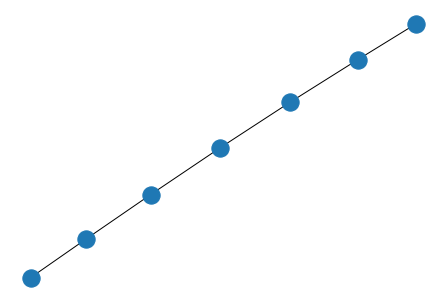

In [25]:
###### Page Rank 
import networkx as nx
import matplotlib.pyplot as plt
G1=nx.barbell_graph(4,3)  #Two complete graphs connected by a path
G2=nx.complete_graph(4)  #Each node connected to every other node
G3=nx.cycle_graph(4)  #End nodes connected
G4=nx.ladder_graph(3)  #3 nodes on each side
G5=nx.path_graph(7)
G6=nx.star_graph(4)
G7=nx.wheel_graph(6)  #one vertex is connected to all like chakra or rim
G8=nx.gnp_random_graph(5,0.5) #5 nodes and there is 0.5 probability that they are connected
nx.draw(G5)
plt.show()

In [4]:
#Page Rank 2 (by random hopping method)
import networkx as nx
import random
import matplotlib.pyplot as plt
import operator

G=nx.gnp_random_graph(10,0.5, directed=True)
#nx.draw(G,with_labels=True)
#plt.show()
#x is the random source node
x=random.choice([i for i in range(G.number_of_nodes())]) #G.number_of_nodes()=10
dict_counter={}
for i in range(G.number_of_nodes()):
    dict_counter[i]=0
dict_counter[x]+=1
for i in range(100000):
    list_n=list(G.neighbors(x))
    if (len(list_n)==0):  #if x is a sink
        x=random.choice([i for i in range(G.number_of_nodes())])
        dict_counter[x]+=1  #increments the node value by 1 
    else:
        x=random.choice(list_n) #change x to a new node (like random jumping)
        dict_counter[x]+=1
      
#Now compute pagerank by function and cross check the vals we received from random function above 
p=nx.pagerank(G)
sorted_p=sorted(p.items(),key=operator.itemgetter(1)) #This is in operator library #1->sort based on values
#Similary for dict_counter
sorted_dict=sorted(dict_counter.items(),key=operator.itemgetter(1))
print ("Function output \n",sorted_p)
print ("Random avg output \n",sorted_dict)

Function output 
 [(1, 0.0651912734446223), (2, 0.07282309327608774), (0, 0.08049195200058606), (8, 0.09760955166391115), (4, 0.09967217553811548), (7, 0.09974936234507716), (3, 0.11045426305864671), (6, 0.12362305261058994), (5, 0.1236360236331653), (9, 0.12674925242919818)]
Random avg output 
 [(1, 6027), (2, 6855), (0, 7728), (8, 9601), (4, 9843), (7, 10016), (3, 11279), (5, 12593), (6, 12815), (9, 13244)]


In [3]:
#PageRank by Vidya(by node distribution method)
#Nodes-.Vertices and Edges->Links
import networkx as nx
U=nx.Graph()
G=nx.DiGraph()
#print (G.nodes())
G.add_nodes_from([i for i in range(5)])
#print (G.nodes())
#print (list(G.nodes()))
print (G.edges())
print (G.out_edges())
print (G.in_edges())
G.add_edge(1,2)
print (G.edges())
print (G.out_edges())
print (G.in_edges())
print (G.out_edges(1))
print (G.out_edges(2))              #Out-edge- Outgoing edge; In-edge-Incoming edge
print (G.in_edges(1))
G.add_edge(2,3)
#G.add_edge(3,2)
G.add_edge((3,4),(4,1))         #Dont use this as ambiguous output
print (G.out_edges(1))
print (G.out_edges(2))

[]
[]
[]
[(1, 2)]
[(1, 2)]
[(1, 2)]
[(1, 2)]
[]
[]
[(1, 2)]
[(2, 3)]


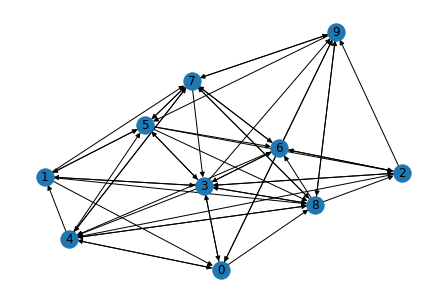

In [5]:
#Page Rank 2
import networkx as nx
import random
import matplotlib.pyplot as plt
G=nx.DiGraph()                     #D and G both in caps
G.add_nodes_from([i for i in range(10)])
def add_edges():
    nodes=list(G.nodes())
    for s in nodes:
        for t in nodes:
            if s!=t:
                r=random.random()
                if r<=0.5:
                    G.add_edge(s,t)
    return G
def assign_points(G):
    nodes=list(G.nodes())
    p=[]
    for each in nodes:
        p.append(100)
    return p
def keep_distributing(points,G):
    while(1):
        new_points=distribute_points(G,points)
        print (new_points)
        points=new_points
        stop=input("Press # to stop")
        if stop==#:
            break
    return new_points
def distribute_points(G,points):
    nodes=list(G.nodes())
    new_points=[]
    for i in range(len(nodes)):
        new_points.append(0)
    for n in nodes:
        out=list(G.out_edges(n))
        if len(out)==0:
            new_points[n]=new_points[n]+points[n]
        else:
            share=points[n]/len(out)
            for (src,tgt) in out:
                new_points[tgt]=new_points[tgt]+share
                ###Pending
G=add_edges()
#Visualise the graph
nx.draw(G,with_labels=True)
plt.show()

In [3]:
#Famous 3n+1 problem or Collatz conjecture
i=int(input("Enter a no"))
while (1):
    
    if i==1:
        print (i)
        break
    if i%2==0:
        i=i/2
        print ("i",i)
    else:
        i=3*i+1
        print ("i",i)

Enter a no9
i 28
i 14.0
i 7.0
i 22.0
i 11.0
i 34.0
i 17.0
i 52.0
i 26.0
i 13.0
i 40.0
i 20.0
i 10.0
i 5.0
i 16.0
i 8.0
i 4.0
i 2.0
i 1.0
1.0


In [21]:
#Programming Assignment-1 - Holes
#ADOPQR
#B
'''
Programming Assignment-1: Holes
Due on 2019-04-25, 23:59 IST
Let us assume paper as the plane and a letter as a curve on the plane, then each letter divides the plane into 
regions. For example letters "A", "D", "O", "P", "R" divide the plane into two regions so we say these letters 
each have one hole. Similarly, letter "B" has two holes and letters such as "C", "E", "F", "K" have no holes.
We say that the number of holes in the text is equal to the total number of holes in the letters of the text. 
Write a program to determine how many holes are in a given text.

Input Format:
The only line contains a non-empty text composed only of uppercase letters of English alphabet.

Output Format:
output a single line containing the number of holes in the corresponding text.

Example-1

Input:
DRINKEATCODE

Output:
5


Explanation:
D R A O D has one hole hence total number of holes in the text is 5.

'''
out=0
a=input()
for i in a:
    if (i=="A" or i=="D" or i=="O" or i=="P" or i=="Q" or i=="R"):
        out+=1
    elif i=="B":
        out+=2
print (out)

g
0


In [57]:
#PA-2
'''
Programming Assignment-2: Smallest Palindrome
Due on 2019-04-25, 23:59 IST
Given a string S having characters from English alphabets ['a' - 'z'] and '.' as the special character
(without quotes). 
Write a program to construct the lexicographically smallest palindrome by filling each of the faded character ('.') with a lower case alphabet.

Definition:
The smallest lexicographical order is an order relation where string s is smaller than t, given the first
character of s (s1 ) is smaller than the first character of t (t1 ), or in case they
are equivalent, the second character, etc.

For example "aaabbb" is smaller than "aaac" because although the first three characters
are equal, the fourth character b is smaller than the fourth character c. 

Input Format: 
String S

Output Format: 
Print lexicographically smallest palindrome after filling each '.' character, if it
possible to construct one. Print -1 otherwise.

Example-1

Input:
a.ba

Output:
abba
'''
a1=input()
o=ord(a1[0])
for i in a1:
    if i==".":
        pass
    elif o<ord(i):
        o=ord(i)    

def chk(var):
    var1=var[-1]
    for i in range(len(var)-2,-1,-1):
        var1=var1+var[i]
    if var1==var:
        return (True,var)
    else:
        return (False,var)
for i in range(97,o+1):
    a2=a1.replace(".",chr(i))
    out=chk(a2)
    if out[0]:
        print (out[1])
        break
if out[0]==False:
    print ("-1")

rtrt.ty
-1


In [37]:
a="etydi"
print (a.replace("t","j"))
print (a)

ejydi
etydi


In [20]:
print (ord("z"))
print (chr(122))

122
z


In [73]:
#PA-3
'''
Programming Assignment-3: Letters
Due on 2019-04-25, 23:59 IST
Write a program that accepts a sentence and calculate the number of upper case letters and lower case letters.

Input Format:
The first line of the input contains a statement.

Output Format:
Print the number of upper case and lower case respectively separated by a space.

Example:

Input:
Hello world!

Output:
1 9
'''
a=input()

k=0;m=0
for i in a:
    
    if ord(i)>=65 and ord(i)<=90:
        k+=1
        
    elif ord(i)<=122 and ord(i)>=97:
        m+=1
        
print (k,m,end="")

fghf nm
0 6